# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading In Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Making a Box Plot
       * 4.4 Calculating Interquartile Range (IQR)
       * 4.5 Dropping Null Values
       * 4.6 Replacing Null Values   
   5. Analysis
       * 5.1. Lineplot of Year Built
       * 5.2. Attempting to Identify the Oldest Building in NYC   
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as CSV in static form

Copy this link address shown below:

![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

### Attribute Information:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| BASE_BBL | Borough, block, and lot number for the tax lot that the footprint is physically located within. | text | No
| MPLUTO_BBL | Borough, block, and lot number to be used for joining the building footprints data to DCP's MapPLUTO data, which aggregates data for condominium buildings using DOF's billing BBL. For non-condominium buildings the billing BBL is the same as the BASE_BBL. For condominium buildings the billing BBL may be the same for multiple buildings on different physical tax lots if they are part of the same billing unit for DOF purposes. | text | No
| BIN | Building Identification Number. A number assigned by City Planning and used by Dept. of Buildings to reference information pertaining to an individual building. The first digit is a borough code (1 = Manhattan, 2 = The Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island). The remaining 6 digits are unique for buildings within that borough. In some cases where these 6 digits are all zeros (e.g. 1000000, 2000000, etc.) the BIN is unassigned or unknown. | double | No
| NAME | Building name (limited to commonly known names). This field has not been actively maintained since the original creation of this dataset. | text | No
| LSTMODDATE | Feature last modified date | date | No
| LSTSTATTYPE | Feature last status type (Demolition, Alteration, Geometry, Initialization, Correction, Marked for Construction, Marked For Demolition, Constructed) | text | No
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No
| DOITT_ID | Unique identifier assigned by DOITT.  | double | No
| HEIGHTROOF | Building Height is calculated as the difference from the building elevation from the Elevation point feature class and the elevation in the interpolated TIN model. This is the height of the roof above the ground elevation, NOT its height above sea level. Records where this is zero or NULL mean that this information was not available. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot. The building height information is updated through our planimetric updates every 4 years. In between those 4-year update cycles, DoITT manually updates building height information from a variety of sources -- (1) Final as-built heights as shown in plan drawings posted on Department of Buildings BIS website (2) EagleView Oblique imagery, direct measurements taken on photogrammetrically controlled aerial imagery (3) Cyclomedia imagery, direct measurements were taken on photogrammetrically controlled terrestrial imagery (for buildings less than 60’ tall, only)
| FEAT_CODE | Type of Building. List of values:<br>2100 = Building<br>5100 = Building Under Construction<br>5110 = Garage<br>2110 = Skybridge<br>1001 = Gas Station Canopy<br>1002 = Storage Tank<br>1003 = Placeholder (triangle for permitted bldg)<br>1004 = Auxiliary Structure (non-addressable, not garage)<br>1005 = Temporary Structure (e.g. construction trailer) | long | No
| GROUNDELEV | Lowest Elevation at the building ground level. Calculated from LiDAR or photogrammetrically. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot.
| GEOM_SOURCE | Indicates the reference source used to add or update the feature. Photogrammetric means the feature was added or updated using photogrammetric stereo-compilation methodology. This is the most accurate update method and should conform to the ASPRS accuracy standards. Other (Manual) means the feature was added or updated by heads-up digitizing from orthophotos or approximated from a plan drawing. These features will be generally be less accurate and may not conform to the ASPRS accuracy standards. | text | No

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



# 2. Reading in Data as a pandas Dataframe

If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the CSV link. The path might have been updated.

In [3]:
# reading in our data as a pandas dataframe called building_df
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview the data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


# 3. Data Inspection

## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1083342,MULTIPOLYGON (((-73.75612604606732 40.74547031...,NaN,4451730,1980.0,08/22/2017 12:00:00 AM,Constructed,296444,28.000000,2100,103.0,0,0,4076210001,4076210001,Other (Man,{D12F068F-17A2-4C50-AA45-FCF3822F3E3C}
1083343,MULTIPOLYGON (((-73.83440749536311 40.75742362...,NaN,4540380,2006.0,04/11/2019 12:00:00 AM,Constructed,1114668,185.779728,2100,22.0,0,0,4050660001,4050660001,Photogramm,{E549C8DC-0457-43CB-88F6-136472CE6946}
1083344,MULTIPOLYGON (((-74.0000149828318 40.688200830...,NaN,3394115,2009.0,08/22/2017 12:00:00 AM,Constructed,1114346,81.127098,2100,17.0,0,0,3003040018,3003040018,Photogramm,{A200FA56-7C7C-42F7-AA99-2C9DD5BF9EF6}
1083345,MULTIPOLYGON (((-73.75575981238948 40.74634860...,NaN,4446731,1980.0,08/22/2017 12:00:00 AM,Constructed,471119,28.000000,2100,101.0,0,0,4076210001,4076210001,Other (Man,{943AE915-DA7C-4B6D-A082-32BB35961261}
1083346,MULTIPOLYGON (((-73.7563415969857 40.746859582...,NaN,4451963,1980.0,08/22/2017 12:00:00 AM,Constructed,19653,28.000000,2100,96.0,0,0,4076210001,4076210001,Other (Man,{BF9FB2DD-DFF3-4172-B3B2-7B5852B306AF}


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1083347, 16)

In [7]:
# more readable
rows, columns = building_df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,083,347 rows and 16 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [10]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE       int64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [11]:
# printing the column names, non-null counts, and datatypes of our columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083347 entries, 0 to 1083346
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083347 non-null  object 
 1   NAME        2254 non-null     object 
 2   BIN         1083347 non-null  int64  
 3   CNSTRCT_YR  1072987 non-null  float64
 4   LSTMODDATE  1083347 non-null  object 
 5   LSTSTATYPE  1083025 non-null  object 
 6   DOITT_ID    1083347 non-null  int64  
 7   HEIGHTROOF  1080700 non-null  float64
 8   FEAT_CODE   1083347 non-null  int64  
 9   GROUNDELEV  1082783 non-null  float64
 10  SHAPE_AREA  1083347 non-null  int64  
 11  SHAPE_LEN   1083347 non-null  int64  
 12  BASE_BBL    1083347 non-null  int64  
 13  MPLUTO_BBL  1083347 non-null  int64  
 14  GEOMSOURCE  1083029 non-null  object 
 15  GLOBALID    1083347 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.2+ MB


In [12]:
# printing index type
building_df.index

RangeIndex(start=0, stop=1083347, step=1)

In [13]:
# printing True/False if column is unique on our unique key (DOITT_ID)
unique = building_df['DOITT_ID'].is_unique
print('our unique id is truly unique: {}'.format(unique))

our unique id is truly unique: True


## 3.2 Calculating Summary Statistics

In [14]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.083347e+06,1.072987e+06,1.083347e+06,1.080700e+06,1.083347e+06,1.082783e+06,1083347.0,1083347.0,1.083347e+06,1.083347e+06
mean,3.712971e+06,1.939623e+03,5.948542e+05,2.769527e+01,2.693444e+03,5.512157e+01,0.0,0.0,3.564182e+09,3.564182e+09
std,1.026635e+06,2.946186e+01,3.621961e+05,2.176582e+01,1.198560e+03,4.154859e+01,0.0,0.0,9.858398e+08,9.858398e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129698e+06,1.920000e+03,2.880715e+05,1.852000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043390e+09,3.043390e+09
50%,4.067896e+06,1.930000e+03,5.763400e+05,2.612286e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019560e+09,4.019560e+09
75%,4.483418e+06,1.955000e+03,8.664315e+05,3.113075e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107010e+09,4.107010e+09
max,5.799523e+06,2.024000e+03,1.301889e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [15]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1083347,2254,1083347,1083025,1083029,1083347
unique,1083347,1896,1781,13,3,1083347
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,800551,1080561,1012022,1


In [16]:
# returning the mode of CNSTRCT_YR
(building_df
 .loc[:, ['CNSTRCT_YR']]
 .mode(numeric_only=True)
 .rename(index={0: "mode"})
)

,CNSTRCT_YR
mode,1920.0


In [17]:
# value counts of the NAME column - top 20
(building_df['NAME']
 .value_counts()
 .head(20)
)

Adler Place Town Houses                  52
Cooper Place Town Houses                 38
Broun Place Town Houses                  36
Debs Place Town Houses                   34
Defoe Place Town Houses                  26
Asch Loop Town Houses                    18
Earhart Lane Town Houses                 16
NO NAME                                   9
Restrooms                                 8
Kimball Block                             6
10                                        5
20                                        5
Educational Park                          5
Park Maintenance                          4
21                                        4
22                                        4
Thomas Greene Playground-Building         4
5                                         4
4                                         4
Lawrence C Thompson Mem Park-Building     4
Name: NAME, dtype: int64

In [18]:
# compute pairwise correlation of columns, excluding NA/null values
building_df.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.290921,0.156298,-0.357479,0.190892,0.086993,NaN,NaN,0.988683,0.988683
CNSTRCT_YR,0.290921,1.000000,0.203557,0.025437,-0.132578,-0.002913,NaN,NaN,0.284805,0.284806
DOITT_ID,0.156298,0.203557,1.000000,-0.160192,0.539663,-0.016972,NaN,NaN,0.075930,0.075930
HEIGHTROOF,-0.357479,0.025437,-0.160192,1.000000,-0.363283,-0.002517,NaN,NaN,-0.328044,-0.328044
FEAT_CODE,0.190892,-0.132578,0.539663,-0.363283,1.000000,0.001660,NaN,NaN,0.090359,0.090359
GROUNDELEV,0.086993,-0.002913,-0.016972,-0.002517,0.001660,1.000000,NaN,NaN,0.106117,0.106117
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988683,0.284805,0.075930,-0.328044,0.090359,0.106117,NaN,NaN,1.000000,1.000000
MPLUTO_BBL,0.988683,0.284806,0.075930,-0.328044,0.090359,0.106117,NaN,NaN,1.000000,1.000000


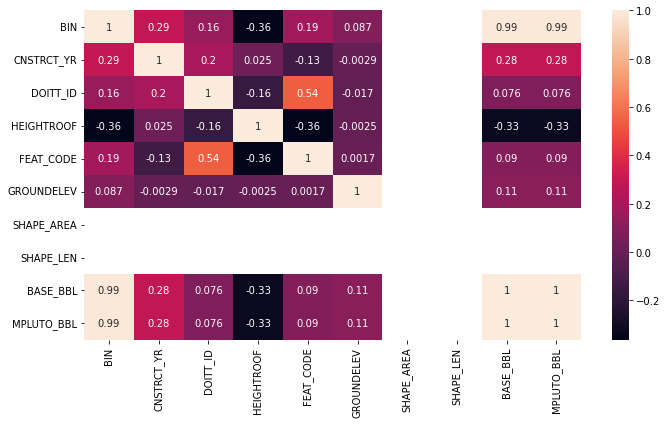

In [19]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    building_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

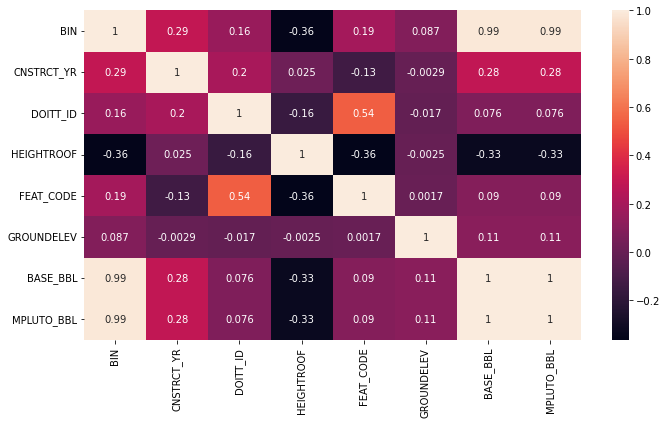

In [20]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10,6))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null/NA Values

In [21]:
# nulls per column
(building_df
 .isnull()
 .sum()
)

the_geom            0
NAME          1081093
BIN                 0
CNSTRCT_YR      10360
LSTMODDATE          0
LSTSTATYPE        322
DOITT_ID            0
HEIGHTROOF       2647
FEAT_CODE           0
GROUNDELEV        564
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GEOMSOURCE        318
GLOBALID            0
dtype: int64

In [22]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,095,304


In [23]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083342,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083343,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083344,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083345,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [25]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (building_df.isnull().sum() / len(building_df)) * 100

# creating a dataframe
missing_data = pd.DataFrame(missing_data, columns=['perc_missing']) 
missing_data = missing_data.sort_values(by='perc_missing', ascending=False)

missing_data

,perc_missing
NAME,99.791941
CNSTRCT_YR,0.956296
HEIGHTROOF,0.244335
GROUNDELEV,0.052061
LSTSTATYPE,0.029723
GEOMSOURCE,0.029353
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000
DOITT_ID,0.000000


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## Attribute Information for CNSTRCT_YR:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No

## 4.1 Previewing Column Values

In [26]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [27]:
# notice the difference of type from dataframe to series
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1083342    1980.0
1083343    2006.0
1083344    2009.0
1083345    1980.0
1083346    1980.0
Name: CNSTRCT_YR, Length: 1083347, dtype: float64

In [29]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets
building_df[["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1083342,1980.0
1083343,2006.0
1083344,2009.0
1083345,1980.0


In [30]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956312,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710956,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
431254,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
52887,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
522025,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [31]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1082320,MULTIPOLYGON (((-73.9842217154888 40.641315363...,NaN,3418384,2024.0,04/01/2024 12:00:00 AM,Constructed,1301776,135.0,2100,58.0,0,0,3053010020,3053010020,Other (Man,{CA9B48A7-3478-42C4-A3AA-206B9F7A4D07}
1079124,MULTIPOLYGON (((-73.81079758791336 40.67271521...,NaN,4620907,2024.0,02/14/2024 12:00:00 AM,Investigate Construction,1301390,NaN,5100,29.0,0,0,4117490003,4117490003,Other (Man,{BA629582-2A56-4119-915F-56D009E51CFC}
1081997,MULTIPOLYGON (((-73.98447675226453 40.58450295...,NaN,3428762,2024.0,03/12/2024 12:00:00 AM,Constructed,1301636,40.0,2100,8.0,0,0,3069530047,3069530047,Other (Man,{51B3191D-13B3-44DC-98E7-EEA1BFBC9B6C}
1081695,MULTIPOLYGON (((-74.18798789974564 40.59222443...,NaN,5175635,2024.0,03/13/2024 12:00:00 AM,Marked for Construction,1301645,45.0,5100,29.0,0,0,5026290001,5026290001,Other (Man,{13368DC0-1DBA-4049-B233-D8B68B54E8CE}
1082243,MULTIPOLYGON (((-73.80418130510829 40.78316567...,NaN,4623685,2024.0,03/26/2024 12:00:00 AM,NaN,1301747,30.0,2100,61.0,0,0,4047460026,4047460026,Other (Man,{F338DB3E-DE6C-4488-86E1-CBEA1C9E86DB}


In [32]:
"""
Descriptive statistics include those that summarize the central tendency, 
dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

Reset index for readability.
"""

(building_df['CNSTRCT_YR']
 .describe()
 .reset_index()
 .rename(columns={'index': "statistic"})
)

,statistic,CNSTRCT_YR
0,count,1.072987e+06
1,mean,1.939623e+03
2,std,2.946186e+01
3,min,1.652000e+03
4,25%,1.920000e+03
5,50%,1.930000e+03
6,75%,1.955000e+03
7,max,2.024000e+03


In [33]:
# detecting any nulls in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .isnull()
 .values
 .any()
)

True

In [34]:
# summing all the null values in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .isnull()
 .sum()
)

10360

In [35]:
# summing all the not null values in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .notnull()
 .sum()
)

1072987

In [37]:
# printing the percent total of all the null values in our 'CNSTRCT_YR' column.
nulls_sum = building_df['CNSTRCT_YR'].isnull().sum() 
nulls_perc = round(nulls_sum / len(building_df) * 100, 4)

print('percent nulls: {}%'.format(nulls_perc))

percent nulls: 0.9563%


In [38]:
# printing the percent total of all the not null values in our 'CNSTRCT_YR' column.
nonnulls_sum = building_df['CNSTRCT_YR'].notnull().sum() 
nonnulls_perc = round(nonnulls_sum / len(building_df) * 100, 4)

print('percent not nulls: {}%'.format(nonnulls_perc))

percent not nulls: 99.0437%


## 4.2 Exploring Distribution of Values

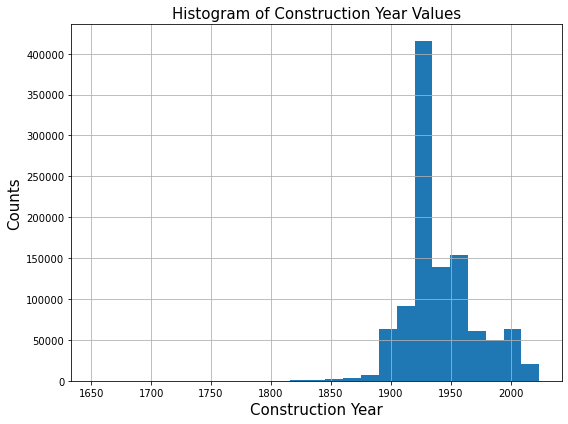

In [41]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins

fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(ax=ax, bins=25)

# adding labels
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Construction Year Values', fontsize=15) 

plt.tight_layout()

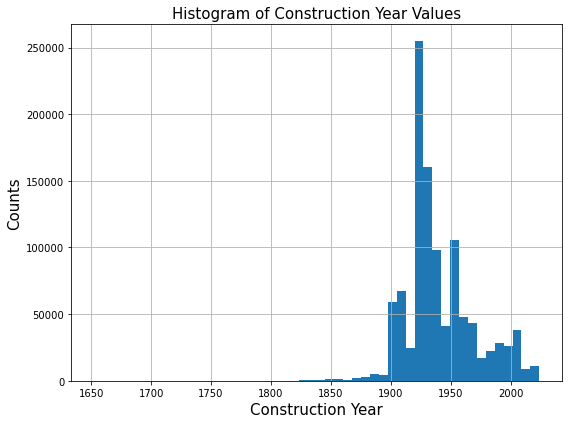

In [45]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(ax=ax, bins=50)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

plt.tight_layout()

In [48]:
# prints the counts of values in our 'CNSTRCT_YR' column in descending order
building_df['CNSTRCT_YR'].value_counts()

1920.0    130103
1930.0    112506
1925.0    109007
1950.0     62639
1910.0     52233
           ...  
1747.0         1
1725.0         1
1797.0         1
1789.0         1
1735.0         1
Name: CNSTRCT_YR, Length: 251, dtype: int64

In [49]:
# counts of values sorted by the index (in this case, year) ascending order
building_df['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1680.0       1
1690.0       1
1694.0       1
          ... 
2020.0    1594
2021.0    1455
2022.0    1536
2023.0     854
2024.0      45
Name: CNSTRCT_YR, Length: 251, dtype: int64

In [50]:
# value counts of the first ten rows sorted by the index ascending order
(building_df['CNSTRCT_YR']
 .value_counts()
 .sort_index(ascending=True)
 .head(10)
)

1652.0    1
1661.0    2
1680.0    1
1690.0    1
1694.0    1
1706.0    1
1719.0    1
1720.0    1
1722.0    1
1725.0    1
Name: CNSTRCT_YR, dtype: int64

In [51]:
# value counts of the first ten rows sorted by the index descending order
(building_df['CNSTRCT_YR']
 .value_counts()
 .sort_index(ascending=False)
 .head(10)
)

2024.0      45
2023.0     854
2022.0    1536
2021.0    1455
2020.0    1594
2019.0    1331
2018.0    2350
2017.0    1962
2016.0    1866
2015.0    1090
Name: CNSTRCT_YR, dtype: int64

## 4.3 Making a Box Plot

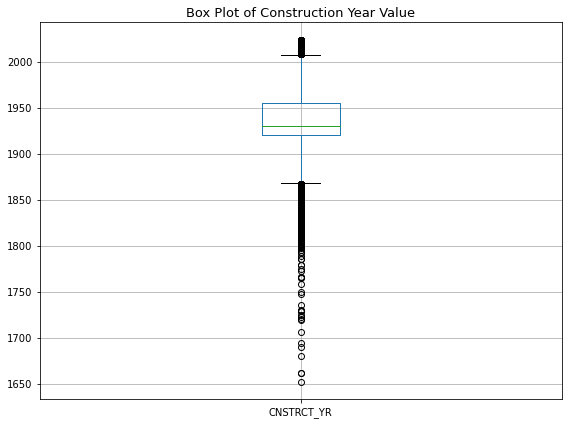

In [53]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(8, 6))

building_df.boxplot(column=['CNSTRCT_YR'], ax=ax)

plt.title('Box Plot of Construction Year Value', fontsize=13)

plt.tight_layout()

## 4.4 Calculating Interquartile Range (IQR)

In [54]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_df['CNSTRCT_YR'].quantile(0.25))
print(building_df['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [55]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_df['CNSTRCT_YR'].quantile(0.25)
Q3 = building_df['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [56]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


## 4.5 Dropping Null Values for CNSTRCT_YR

In [57]:
# dropping all records where 'CNSTRCT_YR' as nan
building_df_dropna = building_df.dropna(subset=['CNSTRCT_YR'])

# printing number of records
print(building_df_dropna.shape[0])

1072987


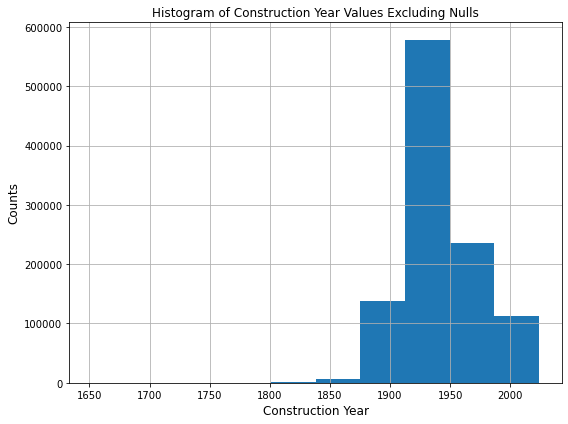

In [60]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df_dropna['CNSTRCT_YR'].hist(bins=10, ax=ax)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values Excluding Nulls', fontsize=12)

plt.tight_layout()

## 4.6 Filling In Null/NA Values With Median for CNSTRCT_YR

In [61]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,360


In [62]:
median = building_df_fillna['CNSTRCT_YR'].median()

print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [63]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)
building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [64]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Analysis

## 5.1 Trends of Year Built

In [65]:
# returning number of buildings by year as 'g'
g = (
    building_df_dropna
     .groupby('CNSTRCT_YR')['DOITT_ID']
     .count()
     .reset_index()
     .rename({'DOITT_ID': 'count'}, axis=1)
     .set_index('CNSTRCT_YR', drop=True)
)

g

,count
CNSTRCT_YR,
1652.0,1
1661.0,2
1680.0,1
1690.0,1
1694.0,1
...,...
2020.0,1594
2021.0,1455
2022.0,1536


In [66]:
# set index to int
g.index = g.index.astype('int64')

g.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


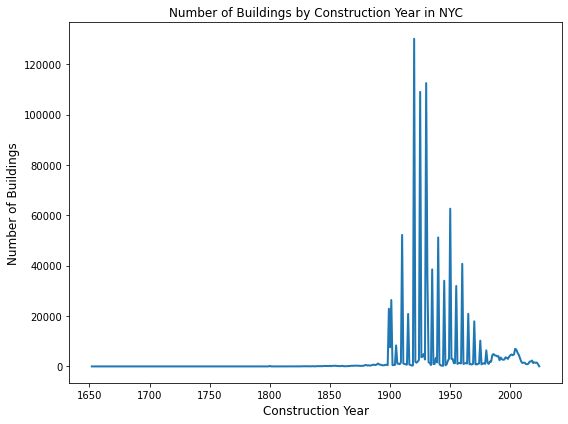

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(g['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [68]:
# previewing number of buildings constructed after 1900
g.loc[g.index >= 1900].head()

,count
CNSTRCT_YR,
1900,7580
1901,26368
1902,502
1903,526
1904,575


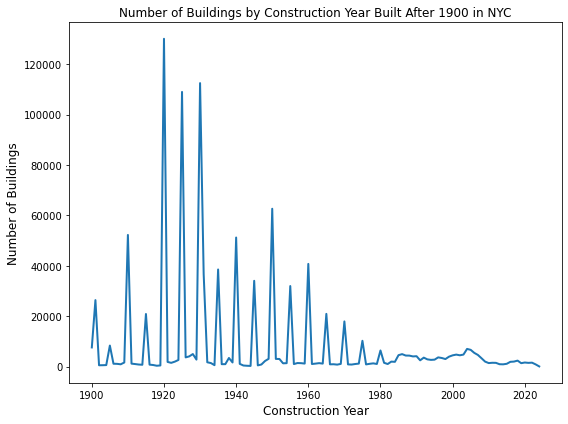

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR' built after 1900
ax.plot(g.loc[g.index >= 1900], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year Built After 1900 in NYC', fontsize=12)

plt.tight_layout()

In [70]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
g['cumsum'] = g['count'].cumsum()

# previewing first five rows
g.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


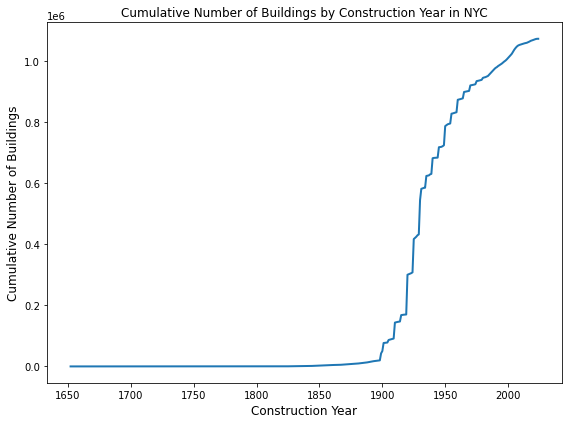

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR'
ax.plot(g['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

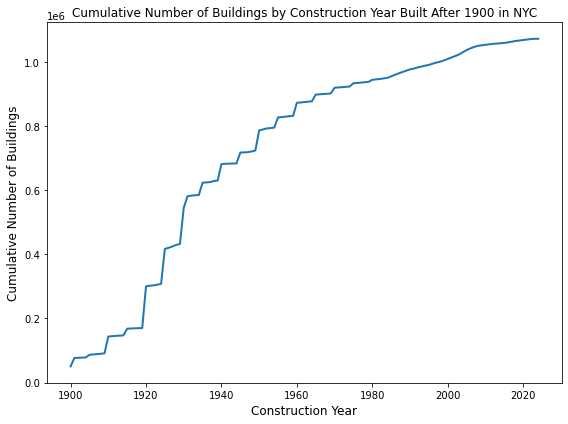

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR' built after 1900
ax.plot(g.loc[g.index >= 1900, ['cumsum']], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year Built After 1900 in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Attempting to identify the oldest building in the dataset

In [74]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956312,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710956,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52887,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
522025,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
504224,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [75]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956312,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset

**Screenshot of Pieter Claesen Wyckoff House from Wikipedia:**

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.